In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Active Case Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County')

In [4]:
b = a.T.Bexar[a.columns[1:]]

In [5]:
a.T.Bexar

Unnamed: 0                                †
Active\r\r\r\r\nCases\r\r\r\r\n4-7      399
Active\r\r\r\r\nCases\r\r\r\r\n4-8      431
Active\r\r\r\r\nCases\r\r\r\r\n4-9      469
Active\r\r\r\r\nCases\r\r\r\r\n4-10     507
                                       ... 
Active\r\r\r\r\nCases\r\r\r\r\n6-5     1017
Active\r\r\r\r\nCases\r\r\r\r\n6-6     1104
Active Cases 06-07                     1135
Active Cases 06-08                     1141
Active Cases 06-09                     1133
Name: Bexar, Length: 65, dtype: object

In [6]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [7]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active Cases'])

In [8]:
c = dated_df.set_index('Date')

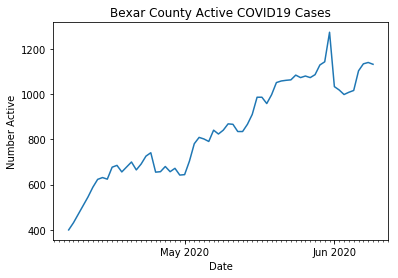

In [9]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Bexar County Active COVID19 Cases')
plt.savefig('BexarActive.png')